In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanictrain.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking shape
df.shape

(891, 12)

#### Observations
 * It has 891 rows and 12 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Observations
 * It has total entries of 891 and 12 columns.
 * Age and cabin has missing values.
 * Two features have float values, five features have object type values and five features have int type values.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## observations
 * The age column has mean more than the median and the max value is also very high,so Age may be right-skewed.
 * Fare column also has a mean value greater than median and the max value is very high,so Fare column can be right-skewed.

### checking for missing values


In [6]:
missing = df.isnull().sum()/df.shape[0] * 100
missing.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [7]:
#It seems cabin colums has high number of missing values lets remove that feature
#Age column has nearly 20 percent missing values,lets try to impute the values later

In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
#Let's separate numerical and categorical variables
numeric = df.select_dtypes(include=[np.number])
categorical = df.select_dtypes(include=[np.object])

In [12]:
print(numeric.shape)
print(categorical.shape)

(891, 7)
(891, 4)


# Univariate analysis

In [17]:
numeric.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [22]:
#lets see how many people have survived
numeric['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Observations
  * It seems 549 people have not survived the titanic disaster and 342 have survived the crash

## Feature- Age

In [25]:
#what's the average age
numeric['Age'].mean()

29.69911764705882

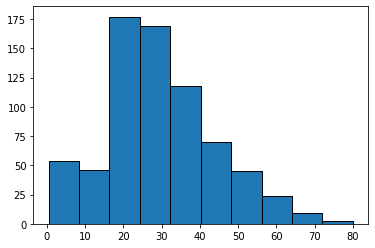

In [28]:
plt.hist(numeric['Age'],edgecolor='black')
plt.show()

## Feature-pclass

In [37]:
numeric['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [38]:
numeric['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Observation
 * 1st class have 216 people.
 * 2nd class have 184 people.
 * 3rd class have majority of the people who boarded the titanic 491.


In [43]:
#Feature-Parch no of parents and children aboard the titanic
numeric['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [45]:
#Feature - sibsp - siblings and spouses aboard the titanic
numeric['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

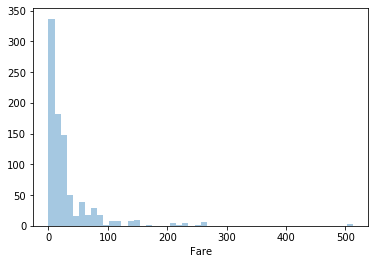

In [51]:
#Feature=Fare
sns.distplot(numeric['Fare'],kde=False)
plt.show()

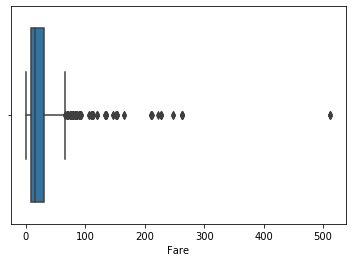

In [56]:
sns.boxplot(numeric['Fare'])

In [57]:
#it seems that most of the values are around zero and have few outilers

In [58]:
categorical.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


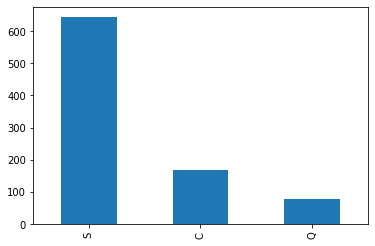

In [128]:
#Embarked
df['Embarked'].value_counts().plot(kind='bar')
plt.show()

In [129]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## observation
* C = Cherbourg, Q = Queenstown, S = Southampton
* More people have embarked from southampton which is the majority compared to Cherbourg and Queenstown

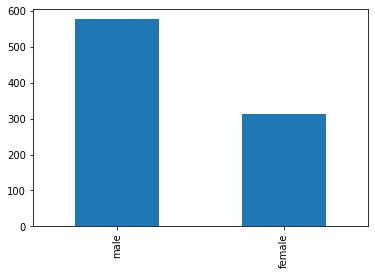

In [117]:
#Ticket and Name is not needed for the analysis so lets the analyaze the sex and embarked
categorical['Sex'].value_counts().plot(kind='bar')
plt.show()

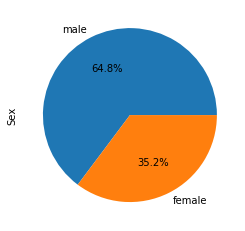

In [65]:
categorical['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

## observation
* Majority of the people who boarded the titanic were male
* Male have occupied nearly 65% and female have occuplied  35%

## Bivariate Analysis

In [67]:
print(categorical.columns)
print(numeric.columns)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [84]:
#lets see how many people survied withrespect to pclass
surv = pd.crosstab(df['Pclass'],df['Survived']) 
surv

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


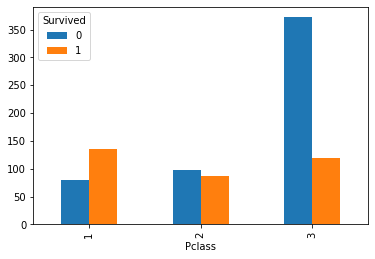

In [77]:
surv.plot(kind='bar')
plt.show()

#### observations
 * It seems first class people have survived more compared to 2nd and 3rd classes.
 * Fatalities are more in 3rd class because majority of the people died

In [93]:
#Lets see what's the average age withrespect to survived
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [100]:
pd.pivot_table(index='Survived',values='Age',aggfunc='mean',data=df)

,Age
Survived,
0,30.626179
1,28.343690


## observation
 * Survived person has an avg age of 28.34
 * People who didnt survive has an avg age of 30.62

In [103]:
pd.crosstab(df['Survived'],df['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


## observation
* Majority of the people (i.e 210) who survived the crash has no siblings and spouses.
* Similarly for the people who didnt survive the crash has no siblings and spouses.

In [104]:
pd.crosstab(df['Survived'],df['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


## observation
* Majority of the people (i.e 233) who survived the crash has no parents and children.
* Similarly for the people who didnt survive the crash has no parents and children.

In [109]:
#whats the total fare amount paid by survived people
pd.pivot_table(index='Survived',values='Fare',aggfunc='sum',data=df)

,Fare
Survived,
0,12142.7199
1,16551.2294


## observation
  * Survived people have total fare of 16551
  * People who didnt survive have total fare of 12142

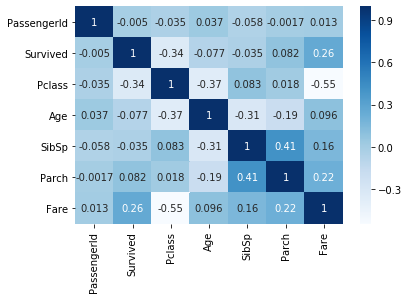

In [113]:
#lets see correlation withrespect to survival
sns.heatmap(numeric.corr(),annot=True,cmap='Blues')

In [119]:
#how many male and female survived
sex = pd.crosstab(df['Sex'],df['Survived'])
sex

Survived,0,1
Sex,,
female,81,233
male,468,109


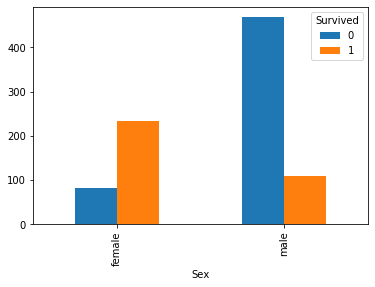

In [123]:
sex.plot(kind='bar')
plt.show()

## observation
  * Female have survived more compared to male and their count is 233
  * Male's survival count is 109 which is very less compared to female

In [130]:
#Embarked withrespect to survival
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


## observation
* Majority of the People who have embarked from southampton didn't survive the crash.
* cherbourg and queenstowns has a survival count of 93 and 30

## Multivariate Analysis

In [132]:
print(categorical.columns)
print(numeric.columns)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


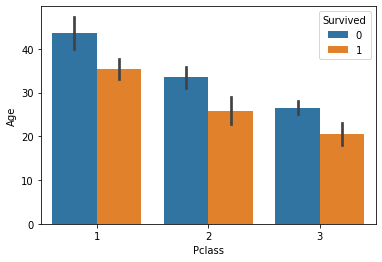

In [141]:
sns.barplot(x='Pclass',y='Age',hue='Survived',data=df)
plt.show()

# observations
* Here the graph shows the average age of people who survived and not survived with respect to different pclasses
* First class people who didnt survive the crash has an avg age of 42 and the people who did survive the crash has an avg age 
   of 35.
* second class people who didnt survive the crash has an avg age of 33 and the people who did survive the crash has an avg age 
   of 25.